# Statistics in Python

## Central Tendency
The *mean, median, mode* are the three statistical measures for analyzing the __central tendency__ of data. These measures are used to find the central value of the data to summarize the entire data set. There are three additional measures of central tendency: the *trimean*, the *geometric mean*, and the *trimmed mean*.

### Mean $(\bar x)$
The **mean** or **average** is the one number that best represents all these data points.

$$\bar x=\frac{x_1+x_2+...+x_n}{n}$$

### Median
The __median__ is the value separating the higher half from the lower half of a data sample (a population or a probability distribution). For a data set, it may be thought of as the "middle" value. The basic advantage of the median in describing data compared to the mean is that it is not skewed so much by extremely large or small values.

<div class="alert alert-info">The mean and the median are the same for symmetric distributions.</div>

### Mode
The __mode__ of a set of data values is the value that appears most often. It is the value x at which its probability mass function takes its maximum value. In other words, it is the value that is most likely to be sampled.

<div class="alert alert-info">The mean of the dataset would always change if there is a change in any value of the dataset. Median and mode may or may not change with altering a single value in the dataset.</div>

### Trimean
The __trimean__ is a weighted average of the 25th percentile, the 50th percentile, and the 75th percentile. Letting $P_{25}$ be the 25th percentile, $P_{50}$ be the 50th and $P_{75}$ be the 75th percentile, the formula for the trimean is:
$$Trimean=\frac{P_{25}+2P_{50}+P_{75}}{4}$$

The median $P_{50}$ is weighted twice as much as the 25th and 75th percentiles.

### Geometric mean
The __geometric mean__ is computed by multiplying all the numbers together and then taking the nth root of the product. For example, for the numbers 1, 10, and 100, the product of all the numbers is: 1 x 10 x 100 = 1,000. Since there are three numbers, we take the cubed root of the product (1,000) which is equal to 10. The formula for the geometric mean is:
$$Geometric Mean=(\Pi x)^{\frac{1}{N}}$$
where the symbol $\Pi$ means to multiply.

### Trimmed mean
__Trimmed mean__ is obtained by removing some of the higher and lower scores and compute the mean of the remaining scores. A mean trimmed 10% is a mean computed with 10% of the scores trimmed off: 5% from the bottom and 5% from the top. A mean trimmed 50% is computed by trimming the upper 25% of the scores and the lower 25% of the scores and computing the mean of the remaining scores. The trimmed mean is similar to the median which, in essence, trims the upper 49+% and the lower 49+% of the scores. Therefore the trimmed mean is a hybrid of the mean and the median. 

## Variability
![line](https://github.com/jamwine/Statistics/blob/master/imgs/line.PNG?raw=true)
### Range
The **Range** describes the extent of variability by considering the distance between the biggest and the smallest values. The larger the range, the more noticeable the variation in the data will be. However, the greatest disadvantage is that it ignores the mean, and is swayed by the outliers; that's where variance comes in.
$$range=x_{max}-x_{min}$$

### Mean Deviation
For Variance, we first calculate __Mean Deviation__ and __Squared Mean Deviation__:

$$Mean\ Deviation=x_i-\bar x$$

$$Squared\ Mean\ Deviation=(x_i-\bar x)^2$$

The sum of mean deviations of the individual will always be 0.

### Variance $(\sigma^2)$ 

__Variance__ is the second-most important number to summarize this set of data points. It is the mean squared deviation of a variable from its mean. The higher the variance, the larger the variability of the data.

$$Variance=\frac{\sum (x_i-\bar x)^2}{n-1}$$

|![wh](https://github.com/jamwine/Statistics/blob/master/imgs/head.png?raw=true)|![wh](https://github.com/jamwine/Statistics/blob/master/imgs/head.png?raw=true)|
|-|-|
|![var1](https://github.com/jamwine/Statistics/blob/master/imgs/var1.PNG?raw=true)|![var2](https://github.com/jamwine/Statistics/blob/master/imgs/var2.PNG?raw=true)|

Variance is improved by tweaking the denominator - this is called __Bessel's Correction__.

Variance Properties:
* If a constant is added to each data point, the variance remains the same. Adding a constant shifts the distribution and doesn't affect variability of the data. The deviations from the mean remains the same as well.
* If a constant is multiplied to each observation, the standard deviation increases proportionally to the constant and the variance increases to the squared constant.

### Standard Deviation $(\sigma)$
Mean and variance succinctly summarize a set of numbers. __Standard Deviation__ is the square root of Variance.

$$Std Dev=\sqrt{\frac{\sum (x_i-\bar x)^2}{n-1}}$$

Standard Deviation is the most common way to estimate the uncertainity of a set of outcomes.

![std1](https://github.com/jamwine/Statistics/blob/master/imgs/std1.PNG?raw=true)

### Percentile Rank
A __percentile rank__ is typically defined as the proportion of scores in a distribution that a specific score is greater than or equal to. For instance, if there is a score of 95 on a math test and this score was greater than or equal to the scores of 88% of the students taking the test, then the percentile rank would be 88 (88th percentile). Alternatively, percentile rank is sometimes defined simply as the proportion of a distribution that a score is greater than.

## Frequency Distribution

The distribution of empirical data is called a __frequency distribution__ and consists of a count of the number of occurrences of each value. If the data are continuous, then a grouped frequency distribution is used. Typically, a distribution is portrayed using a frequency polygon or a histogram. Mathematical equations are often used to define distributions. The normal distribution is, perhaps, the best known example.

A __grouped frequency distribution__ is a frequency distribution in which frequencies are displayed for ranges of data rather than for individual values. For example, the distribution of heights might be calculated by defining one-inch ranges. The frequency of individuals with various heights rounded off to the nearest inch would then be tabulated.

A __histogram__ and a __frequency polygon__ are the graphical representations of a distribution. They partition the variable on the x-axis into various contiguous class intervals of (usually) equal widths. The heights of the _bars_ in a histogram and the _polygon's points_ in a frequency polygon represent the class frequencies.

|![wh](https://github.com/jamwine/Statistics/blob/master/imgs/head.png?raw=true)|![wh](https://github.com/jamwine/Statistics/blob/master/imgs/head.png?raw=true)|
|-|-|
|![hist](https://github.com/jamwine/Statistics/blob/master/imgs/hist.PNG?raw=true)|![fp](https://github.com/jamwine/Statistics/blob/master/imgs/fp.PNG?raw=true)|

## Gaussian Distribution

Properties in the real world can be represented by a normal distribution, also known as __Gaussian Distribution__ or the __Bell Curve__. Normal distributions do not necessarily have the same means and standard deviations. A normal distribution with a mean of 0 and a standard deviation of 1 is called a __standard normal distribution__.

$$N(\mu,\sigma)=\frac{1}{\sqrt {2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

![ga](https://github.com/jamwine/Statistics/blob/master/imgs/ga.PNG?raw=True)

|![wh](https://github.com/jamwine/Statistics/blob/master/imgs/head.png?raw=true)|![wh](https://github.com/jamwine/Statistics/blob/master/imgs/head.png?raw=true)|![wh](https://github.com/jamwine/Statistics/blob/master/imgs/head.png?raw=true)|
|-|-|-|
|![g1](https://github.com/jamwine/Statistics/blob/master/imgs/g1.PNG?raw=True)|![g2](https://github.com/jamwine/Statistics/blob/master/imgs/g2.PNG?raw=True)|![g3](https://github.com/jamwine/Statistics/blob/master/imgs/g3.PNG?raw=True)|

* Normal distributions are symmetric around their mean.
* The mean, median, and mode of a normal distribution are equal.
* The area under the normal curve is equal to 1.0.
* Normal distributions are denser in the center and less dense in the tails. There will be a large number of points close to the average. There will be few extreme values - the number of extreme values at either side of the mean will be the same. 

### z-Score
A value from any normal distribution can be transformed into its corresponding value on a standard normal distribution using the following formula:

$$z=\frac{x-\mu}{\sigma}$$

In other words, __z-score__ is determined in order to normalize the data or standardizing the distribution. The standard normal distribution is sometimes called the __z distribution__. A z score always reflects the number of standard deviations above or below the mean a particular score is.

![zs](https://github.com/jamwine/Statistics/blob/master/imgs/zs.PNG?raw=true)

### Modality
The __modality__ of a distribution is determined by the number of peaks the data presents.
![modality](https://github.com/jamwine/Statistics/blob/master/imgs/modality.PNG?raw=true)
* Most distributions are __Unimodal__ which means it has only one frequently occurring score, clustered at the top while a bimodal has two values occurring frequently.
* A __Bimodal distribution__ is a continuous probability distribution with two different modes. These appear as distinct peaks (local maxima) in the probability density function.
* A __Uniform Distribution__ has a single value which only occurs in a certain range while anything outside that range is just 0. It’s very much an “on or off” distribution. It as an indication of a categorical variable with 2 categories: 0 or the value. The categorical variable might have multiple values other than 0 and it can be visualized in the same way as a piecewise function of multiple uniform distributions.

### Example:
 A random male is selected from the population having 186 cm of height. 
 * What percentage of the men will be shorter than this individual?
 * Which height are 83% of men?
 * What about the likelihood of choosing someone who is 186 cm?

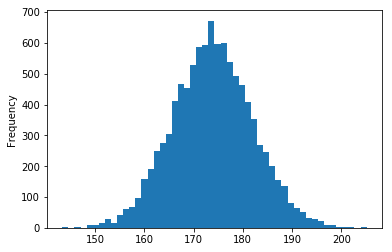

In [1]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

normal_data = stats.norm.rvs(size=10000, loc=174, scale=8.2, random_state=0)
# size is the number of points generated (population), loc is the mean height and scale is the standard deviation in height.

pd.Series(normal_data).plot(kind="hist", bins=50);

**Cumulative distribution function: cdf()** returns the probability of a certain random observation by taking value as input.

In [2]:
# Cumulative distribution function: cdf()
stats.norm.cdf(x=186,         # value
               loc=174,       # Mean
               scale=8.2)     # Standard Deviation

# Result: Around 93% of men will be shorter.

0.9283230216395894

**Percent Point Function: ppf()** is the opposite of cdf(), returns a value by taking quantile as input.

In [3]:
# Percent point function: ppf()
stats.norm.ppf(q=0.83,      # quantile
               loc=174,     # Mean
               scale=8.2)   # Standard Deviation

# Result: 83% of men measure less than 181 cm.

181.82415507579879

**Probability density function: pdf()** gives the likelihood of a random variable assuming a certain value.

In [4]:
# Probability density function: pdf()
stats.norm.pdf(x=186,         # Value to check
               loc=174,       # Distribution start
               scale=8.2)     # Distribution end

0.016674679909584385

## Sampling, Central Limit Theorem
__Inferential Statistics__ is the branch of statistics concerned with drawing conclusions about a population from a sample. This is generally done through random sampling, followed by inferences made about central tendency, or any of a number of other aspects of a distribution. A __population__ is the complete set of observations. In contrast, a __sample__ is a subset of a population. A sample has to be representative to reflect properties of general population. There are different sampling methods of selecting a subset of a population for the purposes of statistical inference.
* In __random sampling__, every member of the population is equally likely to be chosen. 
* In __stratified random sampling__, the population is divided into a number of subgroups (or strata). Random samples are then taken from each subgroup with sample sizes proportional to the size of the subgroup in the population. For instance, if a population contained equal numbers of men and women, and the variable of interest is suspected to vary by gender, one might conduct stratified random sampling to insure a representative sample.
* In __Cluster sampling__, divide the population into groups (clusters). Then a random sample is chosen from the clusters. It’s used when researchers don’t know the individuals in a population but do know the population subsets or groups.

A __representative sample__ is a sample chosen to match the qualities of the population from which it is drawn. With a large sample size, random sampling will approximate a representative sample; stratified random sampling can be used to make a small sample more representative.

A sampling method is __biased__ if each element does not have an equal chance of being selected. For example, a sample of internet users found reading an online statistics book would be a biased sample of all internet users. A random sample is unbiased in nature. Note that possible bias refers to the sampling method, not the result. An unbiased method could, by chance, lead to a very non-representative sample. 

An estimator is biased if it systematically overestimates or underestimates the parameter it is estimating. In other words, it is biased if the mean of the sampling distribution of the statistic is not the paramter it is estimating, The sample mean is an unbiased estimate of the population mean. The mean squared deviation of sample scores from their mean is a biased estimate of the variance since it tends to underestimate the population variance.

|![clt](https://github.com/jamwine/Statistics/blob/master/imgs/clt.png?raw=true)|![clt1](https://github.com/jamwine/Statistics/blob/master/imgs/clt1.png?raw=true)|
|-|-|

The __Central Limit Theorem__ states that given a distribution with a mean μ and variance σ², the sampling distribution of the mean $\mu_{\bar x}$ approaches a normal distribution with a mean $\mu$ and a variance $\sigma^2/n$ as $n$, the sample size, increases. The amazing and counter-intuitive thing about the central limit theorem is that no matter what the shape of the original distribution, the sampling distribution of the mean approaches a normal distribution. Furthermore, for most distributions, a normal distribution is approached very quickly as $n$ increases. Keep in mind that $n$ is the sample size for each mean and not the number of samples. Remember in a sampling distribution the number of samples is assumed to be infinite. The sample size is the number of scores in each sample; it is the number of scores that goes into the computation of each mean.

Visualize the Central Limit Theorem:
http://onlinestatbook.com/stat_sim/sampling_dist/index.html

The mean of the sampling distribution of the difference between means is:

$$\mu_{m_1-m_2}=\mu_1-\mu_2$$

which says that the mean of the distribution of differences between sample means is equal to the difference between population means for distributions $m_1$, $m_2$. For example, say that the mean test score of all 12-year-olds in a population is 34 and the mean of 10-year-olds is 25. If numerous samples were taken from each age group and the mean difference computed each time, the mean of these numerous differences between sample means would be 34 - 25 = 9.

### Business Case Scenarios

#### Challenge_1:
A business client has requested a large freight to be transported urgently from Denver to Salt City. When asked about the weights they could not supply the exact weight, however they have specified that there are a total of 36 boxes. From prior experience from this client, the type of cargo follows a distribution with a mean of 72 lb (or 32.66 kg) and a std. dev. of 3 lb (or 1.36 kg). The plane can carry a max cargo weight of 2630 lb (or 1193 kg).

Based on this information, what is the probability that all of the cargo can be safely loaded onto the plane and transported?

#### Solution_1: 
$$\mu_{\bar x}=\mu=72$$


$$\sigma_{\bar x}=\frac{\sigma}{\sqrt n}=\frac{\sigma}{\sqrt 36}=\frac{3}{6}=0.5$$


$$Plane\ Capacity=2640\ lb$$


$$x_{crit}=\frac{2640\ lb}{36\ boxes}=73.06\ lb/box$$


$$z=\frac{x_{crit}-\mu_{\bar x}}{\sigma_{\bar x}}=\frac{73.06-72}{0.5}=2.12$$

$$Using\ z\ table: P(x<x_{crit})=0.9830=98.3\%$$

#### Challenge:_2
The team of traders earns profit which can be approximated with a Laplace distribution. Profits have a mean of \$95.70 and std. dev. of \$1247. There are about 100 trades every week.
* What is the probability of making over \$20000 in any given week?
* What is the probability of making a loss in any given week?

#### Solution_2: 
|![head](https://github.com/jamwine/Statistics/blob/master/imgs/head.png?raw=true)|![head](https://github.com/jamwine/Statistics/blob/master/imgs/head.png?raw=true)|
|-|-|
|![s1](https://github.com/jamwine/Statistics/blob/master/imgs/s1.png?raw=true)|![s2](https://github.com/jamwine/Statistics/blob/master/imgs/s2.png?raw=true)|

## Box Plot
A box plot perfectly illustrates basic statistical features:
![bp](https://github.com/jamwine/Statistics/blob/master/imgs/bp.PNG?raw=true)
* When the box plot is short it implies that much of the data points are similar, since there are many values in a small range
* When the box plot is tall it implies that much of the data points are quite different, since the values are spread over a wide range
* If the median value is closer to the bottom then most of the data has lower values. If the median value is closer to the top then most of the data has higher values. Basically, if the median line is not in the middle of the box then it is an indication of skewed data.
* The length of the whiskers means that the data has a high standard deviation and variance i.e the values are spread out and highly varying. If there are long whiskers on one side of the box but not the other, then the data may be highly varying only in one direction.

### Interquartile Range (IQR)
The __interquartile range (IQR)__ is the range of the middle 50% of the scores in a distribution. It is a robust measure of variability. The interquartile range is also referred to as the __H-spread__ as the 75th percentile is called the upper hinge and the 25th percentile is called the lower hinge in a box plot. IQR is computed as follows:

$$IQR = 75th\ percentile - 25th\ percentile$$

A related measure of variability is called the semi-interquartile range. The __semi-interquartile range__ is defined simply as the interquartile range divided by 2. If a distribution is symmetric, the median plus or minus the semi-interquartile range contains half the scores in the distribution.

## Skewness

Skewness is a measure of asymmetry around the mean. 

A distribution is skewed if one of its tails is longer than the other. A positive skew has a long tail in the positive direction and a negative skew has a long tail in the negative direction. 

For Normally distributed data, $Skewness = 0$. There is a symmetry about the mean and extreme values are equally likely on both sides of the mean.

|![a](https://github.com/jamwine/Statistics/blob/master/imgs/head.png?raw=true)|![a](https://github.com/jamwine/Statistics/blob/master/imgs/head.png?raw=true)|
|-|-|
|![1](https://github.com/jamwine/Statistics/blob/master/imgs/1.png?raw=true)|![2](https://github.com/jamwine/Statistics/blob/master/imgs/2.png?raw=true)|

For __Right (Positive) Skew__, consider the incomes of individuals where billionaires represent the positive skew. Here, outliers greater than mean are more likely than outliers less than mean. This is a right-skewed distribution and is often seen in cases where the lower bound is defined (example: people with low or zero income) but there is no upper bound (example: people earning billions having no upper limit).

For __Left (Negative) Skew__, consider the losses from storm. Usually there are minor storms, but sometimes there are major storms (outliers) which affects the life, money and property damages heavily. This is a left-skewed distribution as there is an upper bound but there is no lower bound.

Mode is the top-most part of the graph, mean is more affected by outliers than the median and is therefore not a good measure of central tendency for extremely skewed distributons, median lies in between mode and median.

![skew](https://github.com/jamwine/Statistics/blob/master/imgs/skew.PNG?raw=true)

The relationship between skew and the relative size of the mean and median led the statistician Pearson to propose the following simple and convenient numerical index of skew:
$$Skew=\frac{3(Mean-Median)}{\sigma}$$

Although Pearson's measure is a good one, skewness is measured more commonly by the third moment about the mean.
$$Skew=\sum \frac{(X-\mu)^3}{\sigma^3}$$

## Kurtosis

Kurtosis is a measure of how often extreme values on either side of the mean occur. Kurtosis is based on the size of a distribution's tails. Distributions with relatively large tails are called "__leptokurtic__"; those with small tails are called "__platykurtic__." A distribution with the same kurtosis as the normal distribution is called "__mesokurtic__."	

For Normally distributed data, $Kurtosis = 3$

Kurtosis is a measure of tail risk in any situation. If we have high kurtosis, extreme events are more likely to occur than in a normal distribution. For example, 2008 Financial crisis where risk models were incorrectly assuming that markets are normal however, in reality, market returns display significant excess kurtosis. 
$$Excess\ Kurtosis\ =\ Kurtosis-3$$

It can be represented by the fourth moment about the mean:
$$\sum \frac{(X-\mu)^4}{\sigma^4}-3$$

The following two distributions have the same variance, approximately the same skew, but differ markedly in kurtosis.
![kur](https://github.com/jamwine/Statistics/blob/master/imgs/kur.png?raw=true)